### Analyysejä analysointiosaamisen tehtävään 2

In [1]:
# Kirjastojen tuonti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Kaavioiden tyylimäärittely
plt.style.use('seaborn-whitegrid')

# Datan avaaminen
df=pd.read_excel('http://myy.haaga-helia.fi/~taaak/a/t2aineisto.xlsx')
df.head()

,Rahaston nimi,5 vuoden tuotto (% vuodessa),3 vuoden tuotto (% vuodessa),1 vuoden tuotto,6 kuukauden tuotto,Hallinn. ja säilytyspalkkio (% vuodessa),Rahastoluokka
0,Aktia Emerging Market Equity Select,NaN,0.102416,0.079477,0.009875,0.0130,EQ_EMER_GLOBAL
1,Alexandria Kehittyvät Markkinat Osinko,0.035605,0.046230,0.084172,0.017219,0.0100,EQ_EMER_GLOBAL
2,"Danske Invest Global Emerging Markets, EUR",0.034610,0.031894,0.104008,0.023894,0.0192,EQ_EMER_GLOBAL
3,Danske Invest Kehitt. Osakemarkkinat,0.048483,0.050715,0.057189,-0.031143,0.0050,EQ_EMER_GLOBAL
4,Danske Invest SICAV Global Emerging Markets Cl...,0.038146,0.043175,0.119588,0.034600,0.0163,EQ_EMER_GLOBAL


In [2]:
# Lyhyemmät nimet muuttujille
df.columns=['nimi', 'tuotto 5v', 'tuotto 3v', 'tuotto 1v', 'tuotto 6kk', 'palkkio', 'rahastoluokka']

In [3]:
#Tilastolliset tunnusluvut rahastoluokittain
df.groupby('rahastoluokka').describe().T

rahastoluokka     EQ_EMER_GLOBAL   EQ_EUROPE  EQ_FINLAND   EQ_NORAM
tuotto 5v  count       54.000000  102.000000   35.000000  59.000000
           mean         0.045110    0.059901    0.093175   0.110687
           std          0.022169    0.023900    0.019828   0.032052
           min         -0.009174    0.007885    0.061971   0.015565
           25%          0.032487    0.044581    0.079215   0.093254
           50%          0.045375    0.054439    0.091678   0.111822
           75%          0.061216    0.071991    0.101227   0.126099
           max          0.095999    0.131825    0.157576   0.195402
tuotto 3v  count       57.000000  116.000000   35.000000  64.000000
           mean         0.054536    0.063025    0.062598   0.114901
           std          0.030946    0.026940    0.023014   0.038945
           min          0.000906   -0.002968    0.006389  -0.000862
           25%          0.030122    0.045604    0.045293   0.092756
           50%          0.056563    0.068232    0.066497   0.119272
           75%          0.080886    0.078143    0.081353   0.133256
           max          0.128653    0.143609    0.107648   0.199271
tuotto 1v  count       66.000000  134.000000   45.000000  74.000000
           mean         0.073970    0.012292   -0.006496   0.062817
           std          0.048532    0.058860    0.036130   0.055659
           min         -0.060423   -0.188885   -0.066157  -0.170126
           25%          0.046904   -0.019759   -0.028656   0.037920
           50%          0.077658    0.020088   -0.012414   0.069257
           75%          0.103349    0.055760    0.011924   0.098443
           max          0.202221    0.143716    0.134561   0.159728
tuotto 6kk count       69.000000  141.000000   45.000000  74.000000
           mean         0.008902    0.045492    0.040583   0.072773
           std          0.033214    0.029328    0.027900   0.031009
           min         -0.081919   -0.064155    0.007083  -0.064823
           25%         -0.010285    0.027603    0.023029   0.060269
           50%          0.010210    0.049978    0.030791   0.077275
           75%          0.028077    0.065366    0.050759   0.089122
           max          0.157099    0.108983    0.115344   0.119308
palkkio    count       69.000000  142.000000   45.000000  75.000000
           mean         0.014977    0.012146    0.012755   0.012556
           std          0.005870    0.005424    0.005957   0.005777
           min          0.002000    0.000000    0.001590   0.000000
           25%          0.010000    0.008000    0.007800   0.007500
           50%          0.016000    0.012000    0.015000   0.015000
           75%          0.019000    0.017500    0.018000   0.018000
           max          0.025000    0.020000    0.020000   0.022000

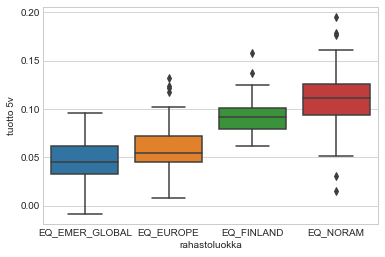

In [4]:
sns.boxplot(x='rahastoluokka', y='tuotto 5v', data=df)

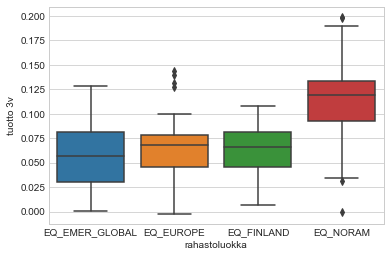

In [5]:
sns.boxplot(x='rahastoluokka', y='tuotto 3v', data=df)

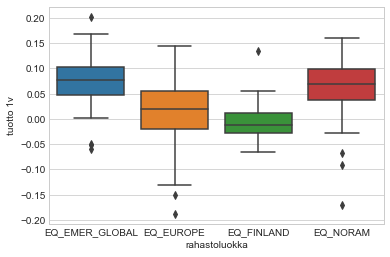

In [6]:
sns.boxplot(x='rahastoluokka', y='tuotto 1v', data=df)

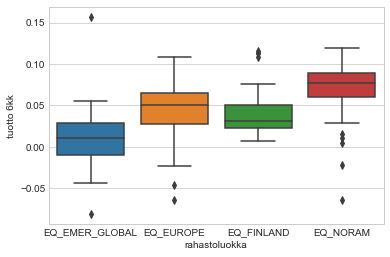

In [7]:
sns.boxplot(x='rahastoluokka', y='tuotto 6kk', data=df)

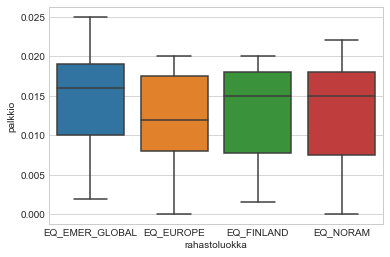

In [8]:
sns.boxplot(x='rahastoluokka', y='palkkio', data=df)

In [9]:
# Korrelaatiokertoimen 1v tuoton ja palkkion välille rahastoluokittain
df.groupby('rahastoluokka')[['tuotto 1v','palkkio']].corr()

tuotto 1v   palkkio
rahastoluokka                                
EQ_EMER_GLOBAL tuotto 1v   1.000000  0.091730
               palkkio     0.091730  1.000000
EQ_EUROPE      tuotto 1v   1.000000 -0.258164
               palkkio    -0.258164  1.000000
EQ_FINLAND     tuotto 1v   1.000000  0.032692
               palkkio     0.032692  1.000000
EQ_NORAM       tuotto 1v   1.000000 -0.346212
               palkkio    -0.346212  1.000000

In [10]:
# pearsonr-funktion tuonti scipy.stats-kirjastosta
from scipy.stats import pearsonr

# Korrelaatiokertoimet ja p-arvot 1v tuoton ja palkkion välille rahastoluokittain
for luokka in pd.unique(df['rahastoluokka']):
    df_dropna = df[df['rahastoluokka']==luokka].dropna(subset=['tuotto 1v', 'palkkio'])
    corr, p = pearsonr(df_dropna['tuotto 1v'], df_dropna['palkkio'])
    print(luokka, 'korrelaatio %.3f,' %corr, 'p-arvo %.3f' %p)

EQ_EMER_GLOBAL korrelaatio 0.092, p-arvo 0.464
EQ_EUROPE korrelaatio -0.258, p-arvo 0.003
EQ_FINLAND korrelaatio 0.033, p-arvo 0.831
EQ_NORAM korrelaatio -0.346, p-arvo 0.003


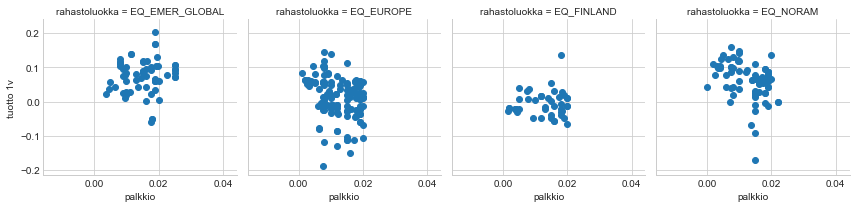

In [11]:
# 1v tuotot ja palkkiot pistekaavioina rahastoluokittain
g = sns.FacetGrid(data=df, col='rahastoluokka')
g = g.map(plt.scatter, 'palkkio', 'tuotto 1v')